# Binary Classification

Runtime > Change Runtime > T4 GPU

Target features is loan_status
1. 0 - Loan Rejected
2. 1 - Loan approved

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Step 2 - Perfom basic data quality checks

In [4]:
df.shape

(58645, 13)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
df.select_dtypes(include="object").nunique()

,0
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_default_on_file,2


# Step 3 - Seperate X and Y (loan_status)

In [9]:
X = df.drop(columns = ["id", "loan_status"])
Y = df["loan_status"]

In [10]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [11]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

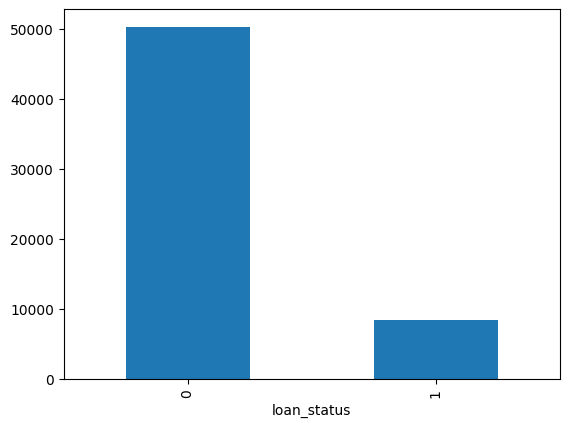

In [13]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [16]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [17]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [18]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


# Step 5 - Apply Preprocessing on xtrain, xtest

In [19]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [20]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [23]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [24]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [25]:
pre.fit(xtrain)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [26]:
xtrain_pre = pre.transform(xtrain)
xtest_pre = pre.transform(xtest)

In [27]:
xtrain_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
xtest_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 6 - Build Neural Networks
1. Dropout Regularization - Drop randomly certain connections
2. Early Stopping

## Dropout
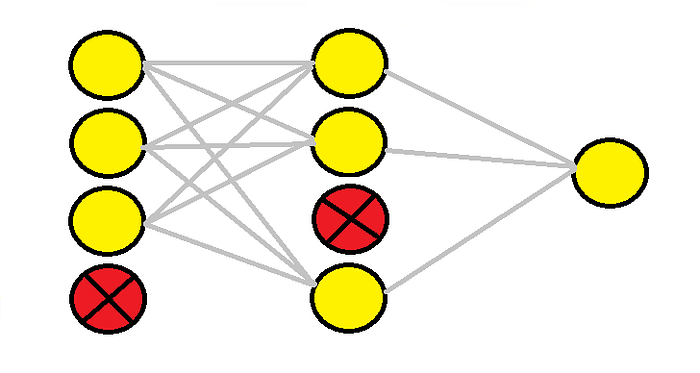

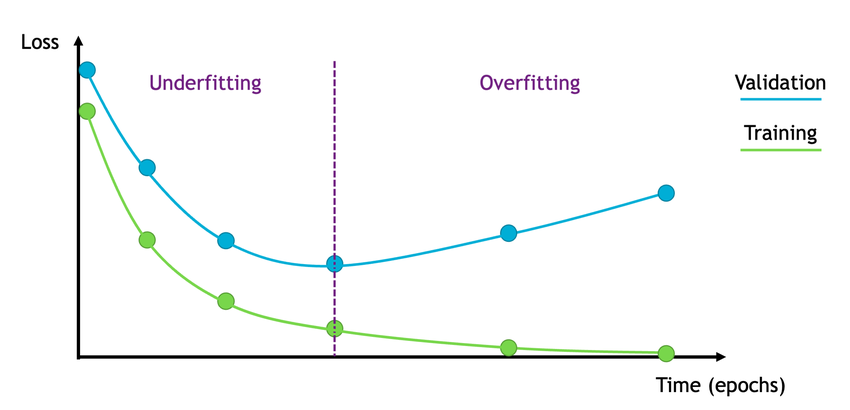

# L1 - Lasso - Penalty applied on absolute value of weights

# L2 - Ridge - Penalty applied on squared value of weights

In [29]:
xtrain_pre.shape[1]

22

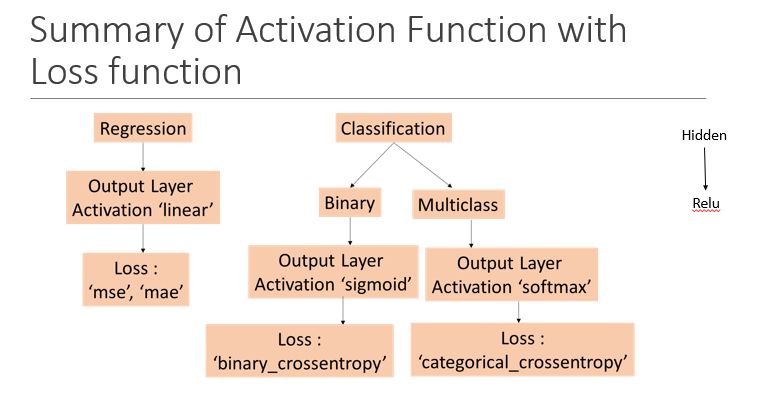

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [31]:
model = Sequential(
    layers = [
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(16, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ]
)

In [32]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["auc"])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# early stopping to avoid overfitting
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [35]:
# fit the model
hist = model.fit(
    xtrain_pre, ytrain, validation_split=0.2, epochs=100, callbacks=[es]
)

Epoch 1/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - auc: 0.7874 - loss: 0.5824 - val_auc: 0.8987 - val_loss: 0.2824
Epoch 2/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8925 - loss: 0.2814 - val_auc: 0.9039 - val_loss: 0.2645
Epoch 3/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8972 - loss: 0.2703 - val_auc: 0.9046 - val_loss: 0.2607
Epoch 4/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc: 0.8946 - loss: 0.2627 - val_auc: 0.9045 - val_loss: 0.2577
Epoch 5/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8953 - loss: 0.2669 - val_auc: 0.9053 - val_loss: 0.2551
Epoch 6/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8950 - loss: 0.2640 - val_auc: 0.9074 - val_loss: 0.2510
Epoch 7/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8991 - loss: 0.2585 - val_auc: 0.9073 - val_loss: 0.2497
Epoch 8/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.8989 - loss: 0.2592 - val_auc: 0.9081 - val_loss: 0.2506
Epoch 9/100
1173/1173 ━━━━━━━━━

# Plot the learning curve

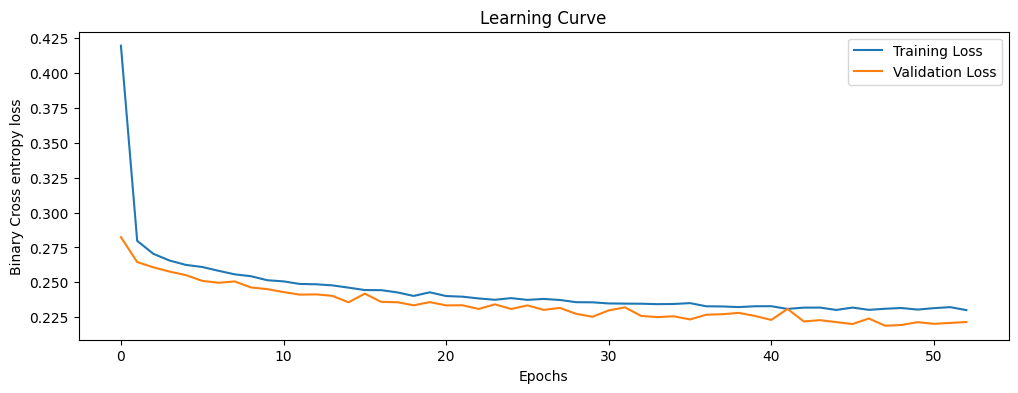

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross entropy loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Step 7 - Model Evaluation

In [37]:
train_loss, train_auc = model.evaluate(xtrain_pre, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train AUC : {train_auc:.4f}")

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.9224 - loss: 0.2159
Train Loss : 0.2155
Train AUC : 0.9231


In [38]:
test_loss, test_auc = model.evaluate(xtest_pre, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test AUC : {test_auc:.4f}")

367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.9376 - loss: 0.2053
Test Loss : 0.2104
Test AUC : 0.9300


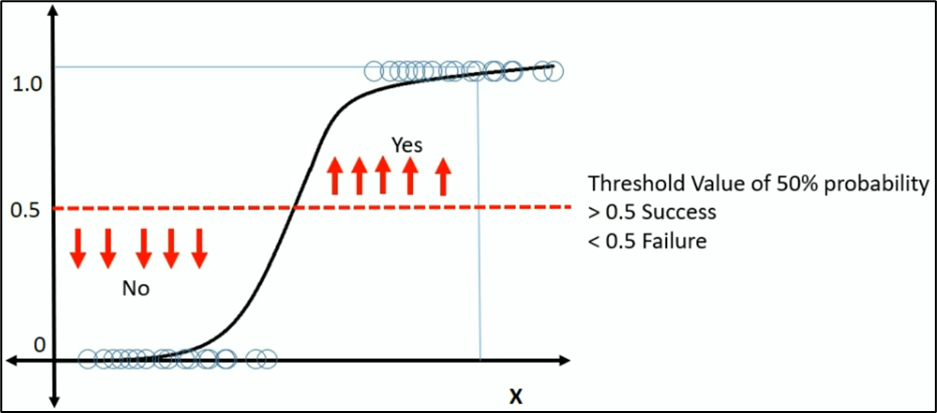

In [39]:
yprob_train = model.predict(xtrain_pre)
yprob_train[0:5]

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.23950295],
       [0.07541643],
       [0.01857287],
       [0.0201631 ],
       [0.04002798]], dtype=float32)

In [40]:
ypred_train = [1 if prob >= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [41]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.05109463],
       [0.03502047],
       [0.15861778],
       [0.13788585],
       [0.0567029 ]], dtype=float32)

In [42]:
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[0, 0, 0, 0, 0]

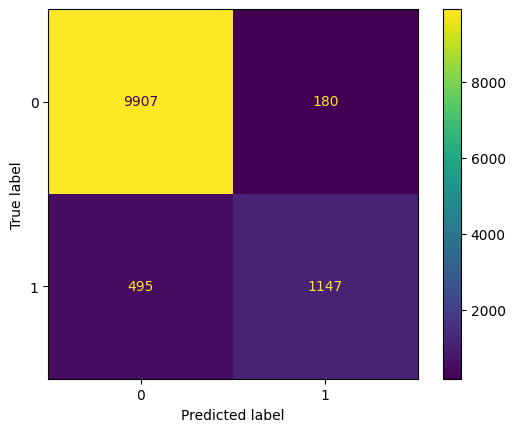

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10087
           1       0.86      0.70      0.77      1642

    accuracy                           0.94     11729
   macro avg       0.91      0.84      0.87     11729
weighted avg       0.94      0.94      0.94     11729



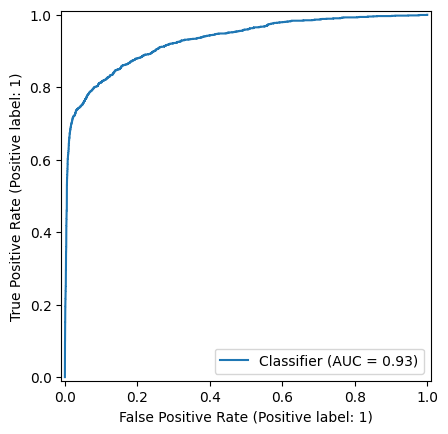

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

# From above metrics f1_macro > 0.8 also ROC_AUC score is 0.93 which is considered to be a good model

# Step 8 - Out of sample prediction

In [48]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv


In [50]:
xnew = pd.read_csv(url2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [51]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [52]:
probs = model.predict(xnew_pre)
probs[0:5]

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.8904528 ],
       [0.03552002],
       [0.52016354],
       [0.0556525 ],
       [0.10621761]], dtype=float32)

In [53]:
preds = [1 if prob >= 0.5 else 0 for prob in probs]
preds[0:5]

[1, 0, 1, 0, 0]

In [54]:
res = xnew[["id"]]
res["loan_status"] = preds
res["prob"] = probs.round(4)

In [55]:
res

,id,loan_status,prob
0,58645,1,0.8905
1,58646,0,0.0355
2,58647,1,0.5202
3,58648,0,0.0557
4,58649,0,0.1062
...,...,...,...
39093,97738,0,0.0486
39094,97739,0,0.0210
39095,97740,0,0.0255
39096,97741,0,0.2940


In [56]:
res["loan_status"].value_counts()

,count
loan_status,
0,34791
1,4307


<Axes: xlabel='loan_status'>

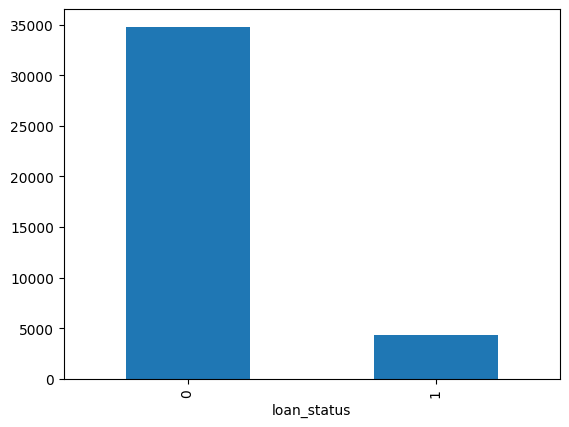

In [57]:
res["loan_status"].value_counts().plot(kind="bar")

In [64]:
res.to_csv("loan_results.csv", index=False)

# Step 9 - Save the preprocessor and model

In [58]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [59]:
model

<Sequential name=sequential, built=True>

In [60]:
import joblib

joblib.dump(pre, "loan_pre.joblib")

['loan_pre.joblib']

In [61]:
# save model using built in keras function
model.save("loan_model.keras")

# Load above objects

In [62]:
p = joblib.load("loan_pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [63]:
from keras.models import load_model

m = load_model("loan_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)